# Heart Disease Classification

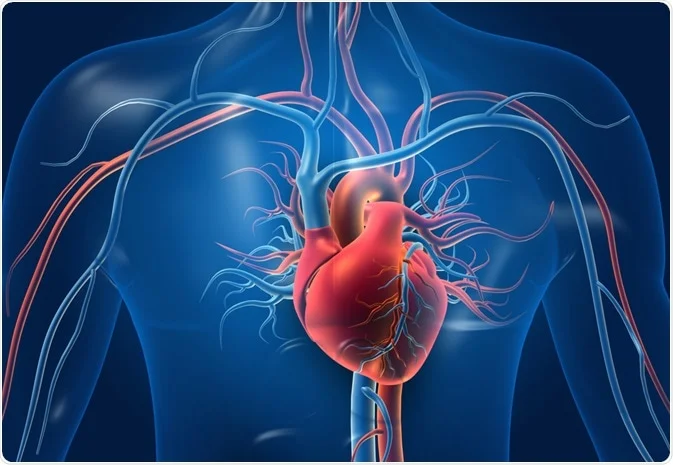

## Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Loading the dataset

In [2]:
df = pd.read_csv("../datasets/Health Care Datasets/Heart Attack.csv")

In [3]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
df.shape

(1319, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [7]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


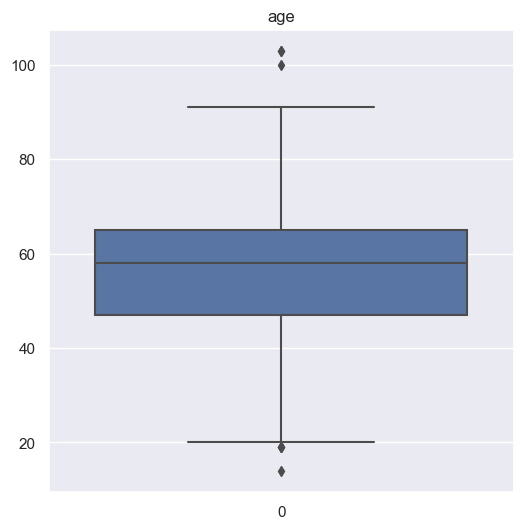

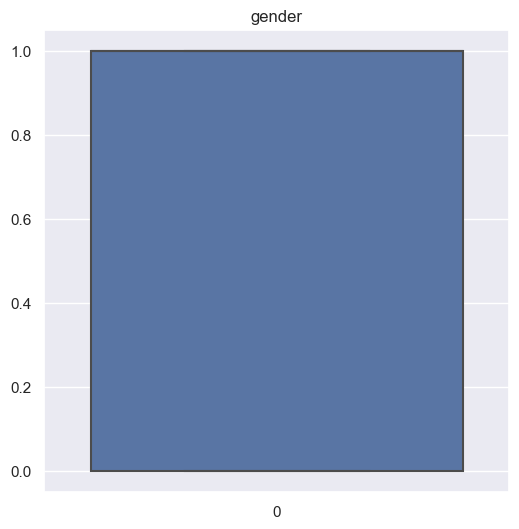

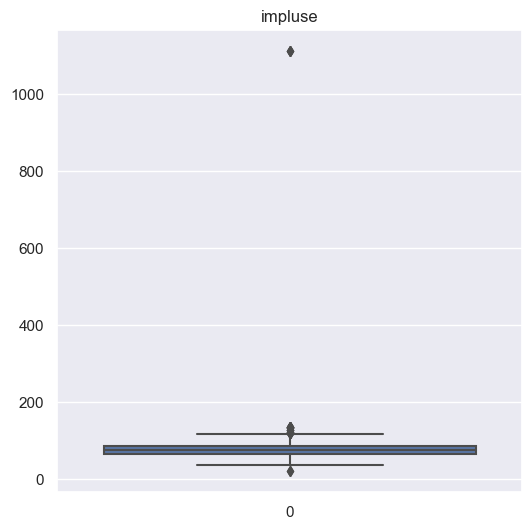

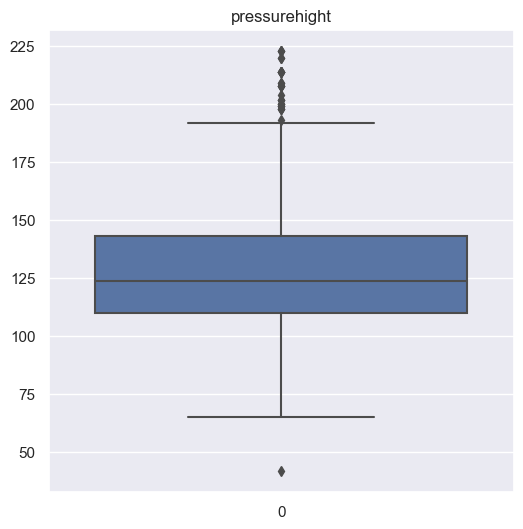

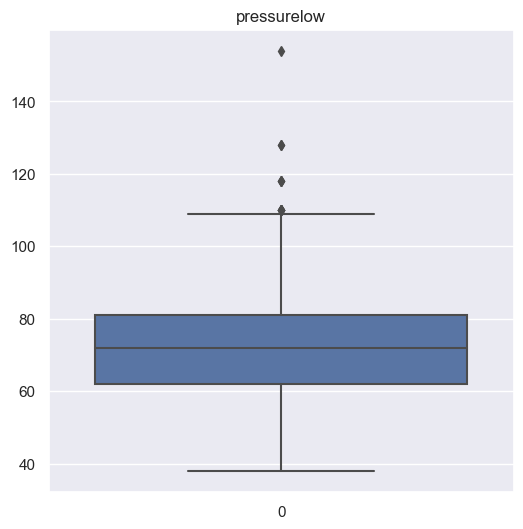

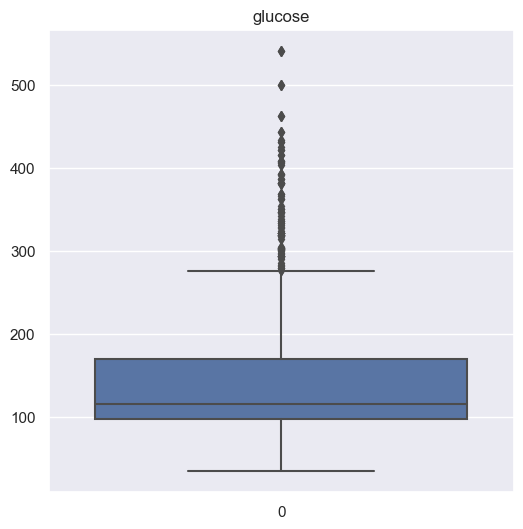

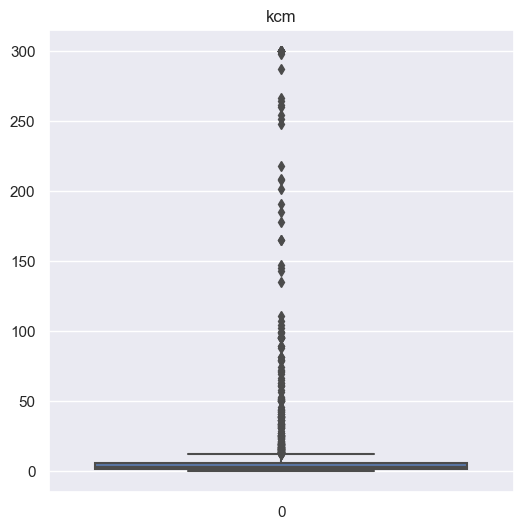

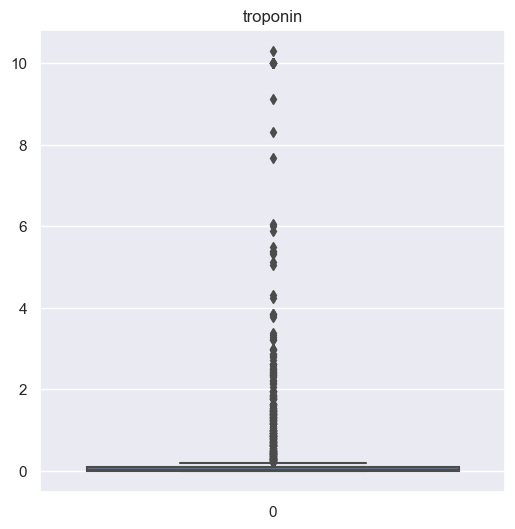

In [11]:
for i in df.select_dtypes(exclude="object"):
    plt.figure(figsize=(6,6))
    sns.boxplot(df[i])
    plt.title(f"{i}")
    plt.show()

<Figure size 600x600 with 0 Axes>

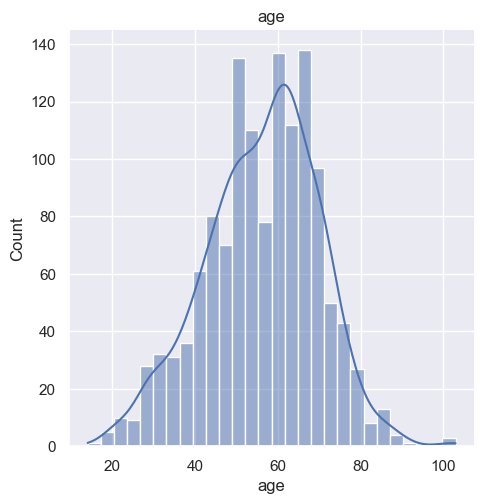

<Figure size 600x600 with 0 Axes>

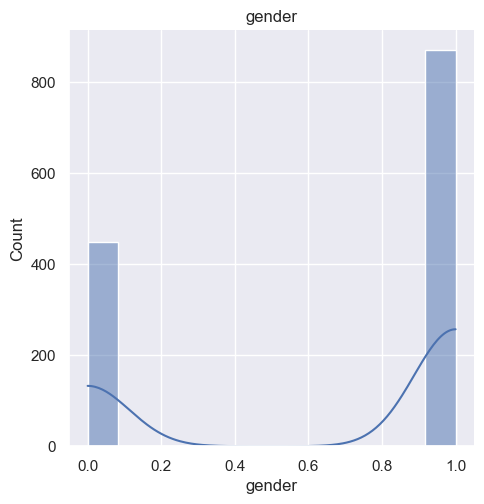

<Figure size 600x600 with 0 Axes>

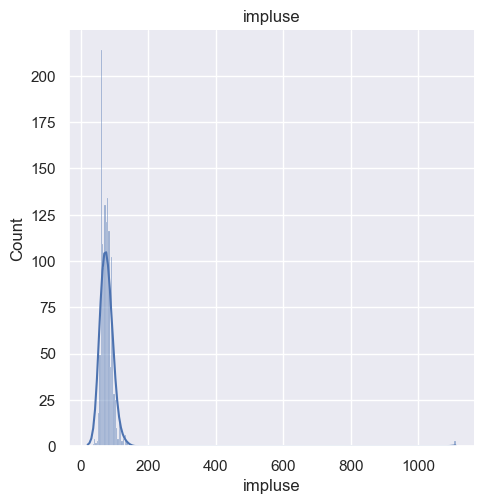

<Figure size 600x600 with 0 Axes>

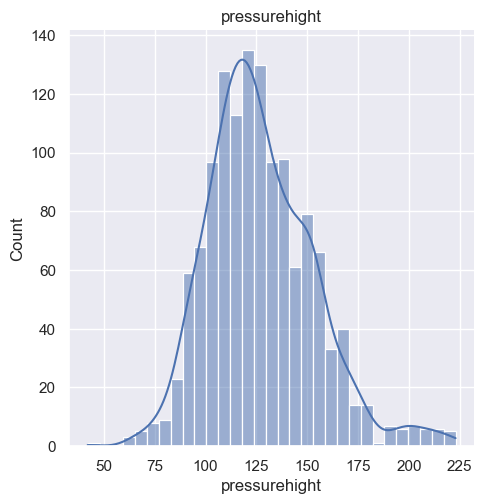

<Figure size 600x600 with 0 Axes>

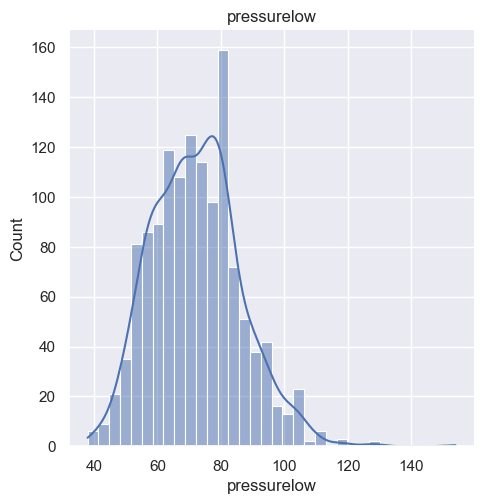

<Figure size 600x600 with 0 Axes>

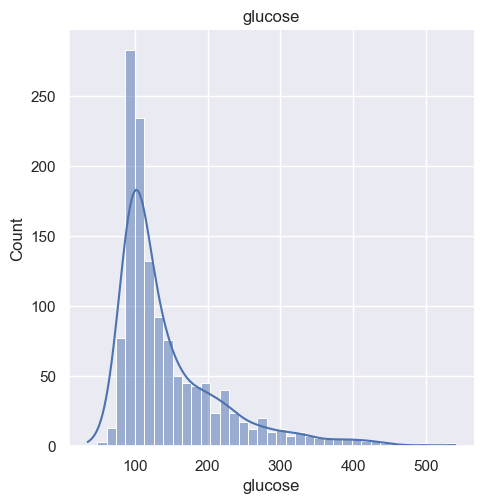

<Figure size 600x600 with 0 Axes>

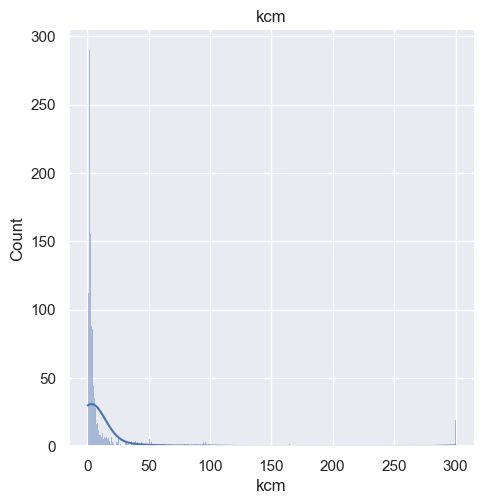

<Figure size 600x600 with 0 Axes>

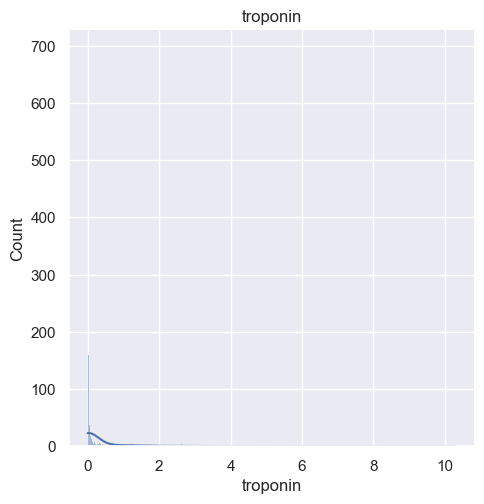

In [12]:
for i in df.select_dtypes(exclude="object"):
    plt.figure(figsize=(6,6))
    sns.displot(df[i], kde=True)
    plt.title(f"{i}")
    plt.show()

## Target Variable

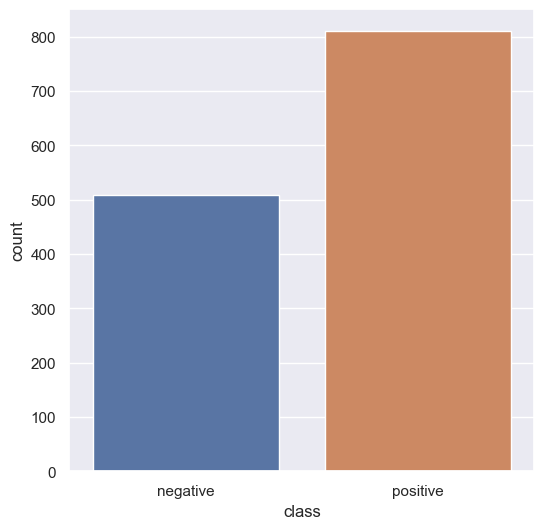

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="class")
plt.show()

## Spitting data into Dependent and Independent variables

In [19]:
X = df.drop("class", axis=1)
y = df["class"]

In [20]:
y = np.where(y == "positive", 1, 0)

## Splitting the data into train and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=101)

## Scaling

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Model

In [42]:
def create_model(X_train, X_test, y_train, y_test, algorithm):
    model = algorithm()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("****"*30)
    
    # Classification Report
    print(classification_report(y_test, y_pred_test))
    print("****"*30)
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.grid(False)
    plt.show()

Train Accuracy: 0.7967644084934277
Test Accuracy: 0.7909090909090909
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       127
           1       0.84      0.81      0.83       203

    accuracy                           0.79       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.79      0.79      0.79       330

************************************************************************************************************************


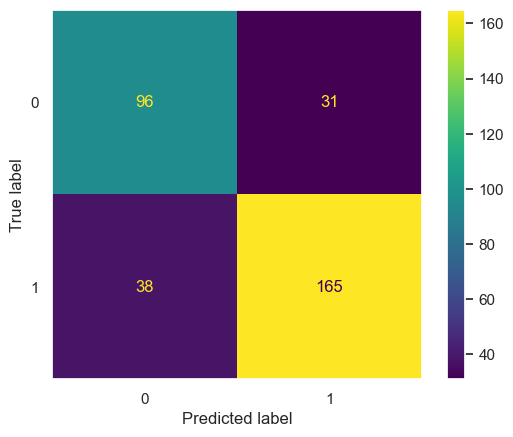

In [43]:
create_model(X_train, X_test, y_train, y_test, LogisticRegression)

Train Accuracy: 0.7724974721941354
Test Accuracy: 0.7424242424242424
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       127
           1       0.80      0.78      0.79       203

    accuracy                           0.74       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.74      0.74      0.74       330

************************************************************************************************************************


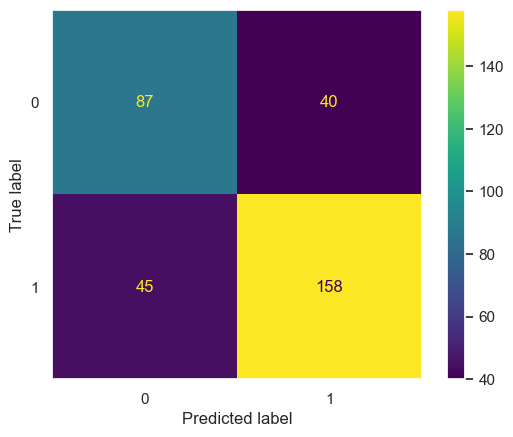

In [44]:
create_model(X_train, X_test, y_train, y_test, SVC)

Train Accuracy: 1.0
Test Accuracy: 0.9818181818181818
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.99      0.99      0.99       203

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

************************************************************************************************************************


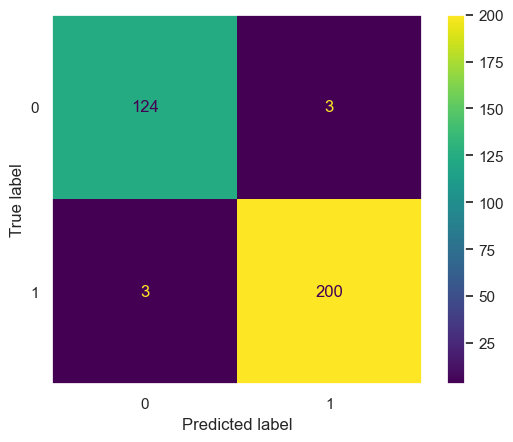

In [45]:
create_model(X_train, X_test, y_train, y_test, RandomForestClassifier)

Train Accuracy: 1.0
Test Accuracy: 0.9818181818181818
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.99      0.99      0.99       203

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

************************************************************************************************************************


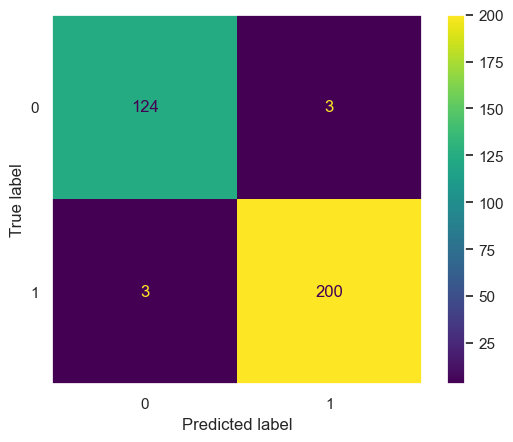

In [46]:
create_model(X_train, X_test, y_train, y_test, GradientBoostingClassifier)

Train Accuracy: 1.0
Test Accuracy: 0.9818181818181818
************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.99      0.99      0.99       203

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

************************************************************************************************************************


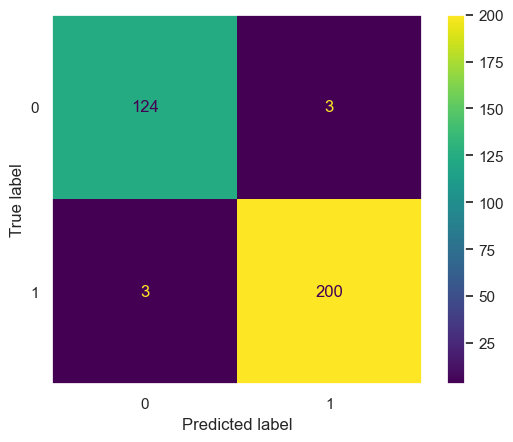

In [47]:
create_model(X_train, X_test, y_train, y_test, AdaBoostClassifier)

## Conclusion

#### 1. Built a classification model to predict heart disease
#### 2. Evaluated and compared different Machine Learning algorithms
#### 3. RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier are performing very well and we are able to predict heart disease with 98% Accuracy.